# Metran practical example

This notebook shows a practical application of Metran on calculated residuals from univariate time series models as published in the article [van Geer and Berendrecht in Stromingen (2015)](#References).

In [1]:
import os

import pandas as pd

import metran

metran.show_versions()

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
numpy version: 1.26.4
scipy version: 1.12.0
pandas version: 2.2.0
matplotlib version: 3.7.2
pastas version: 1.4.0
numba version: 0.59.0
lmfit version: 1.2.2


## Read example data

Read residuals from time series analysis models for 5 piezometers at different depths at location B21B0214. (The time series models are not shown here, only the resulting residuals.)

In [2]:
residuals = {}
rfiles = [
    os.path.join("./data", f) for f in os.listdir("./data") if f.endswith("_res.csv")
]

for fi in rfiles:
    name = fi.split(os.sep)[-1].split(".")[0].split("_")[0]
    ts = pd.read_csv(
        fi, header=0, index_col=0, parse_dates=True, date_format="%Y-%m-%d"
    )
    residuals[name] = ts

In [3]:
# sort names (not necessary, but ensures the order of things)
sorted_names = list(residuals.keys())
sorted_names.sort()
sorted_names

['B21B0214001', 'B21B0214002', 'B21B0214003', 'B21B0214004', 'B21B0214005']

## Create Metran model

First collect series in a list with their unique IDs.

In [4]:
series = []

for name in sorted_names:
    ts = residuals[name]
    ts.columns = [name]
    series.append(ts)

Create the Metran model and solve.

In [5]:
mt = metran.Metran(series, name="B21B0214")
mt.solve()

INFO: Number of factors according to Velicer's MAP test: 1



Fit report B21B0214                  Fit Statistics
tmin     None                        obj        2332.33
tmax     None                        nfev            77
freq     D                           AIC        2344.33
solver   ScipySolve                                    

Parameters (6 were optimized)
                         optimal   stderr initial  vary
B21B0214001_sdf_alpha   5.501017  ±18.98%    10.0  True
B21B0214002_sdf_alpha  13.560042  ±10.04%    10.0  True
B21B0214003_sdf_alpha   4.682870  ±28.86%    10.0  True
B21B0214004_sdf_alpha  11.381674  ±18.22%    10.0  True
B21B0214005_sdf_alpha  13.140605   ±8.48%    10.0  True
cdf1_alpha             22.980925   ±7.43%    10.0  True

Parameter correlations |rho| > 0.5
None

Metran report B21B0214        Factor Analysis
tmin     None                nfct     1
tmax     None                fep     88.32%
freq     D                             

Communality
                       
B21B0214001      73.61%
B21B0214002      87.59%
B21

## Visualizing and accessing Metran results

The results of the Metran can be visualized using the `Metran.plots` class.

### Scree plot

We can draw a scree plot to visualize the eigenvalues (used in determining the number of factors).

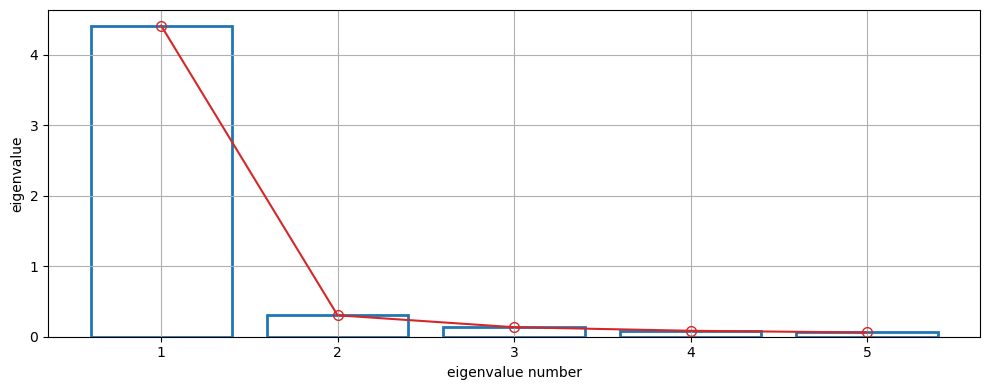

In [6]:
# Plot eigenvalues in scree plot, see e.g. Fig 2 in JoH paper
ax = mt.plots.scree_plot()

### State means

Plot the calculated state means for each of the specific and common dynamic components:

In [7]:
mt.get_state_means()

,B21B0214001_sdf,B21B0214002_sdf,B21B0214003_sdf,B21B0214004_sdf,B21B0214005_sdf,cdf1
date,,,,,,
1988-10-14,0.226549,0.021665,0.028548,0.026005,0.153683,0.809228
1988-10-15,0.182900,0.013039,0.026154,0.022935,0.149910,0.790042
1988-10-16,0.145313,0.004483,0.024958,0.020043,0.147006,0.772353
1988-10-17,0.112540,-0.004048,0.024904,0.017306,0.144954,0.756126
1988-10-18,0.083497,-0.012601,0.025990,0.014702,0.143742,0.741331
...,...,...,...,...,...,...
2005-11-24,0.909463,-0.389068,-0.022535,-0.002155,0.133346,-0.152090
2005-11-25,0.940340,-0.416086,-0.021679,-0.017868,0.134755,-0.288478
2005-11-26,1.001189,-0.445368,-0.021816,-0.033719,0.136945,-0.426332


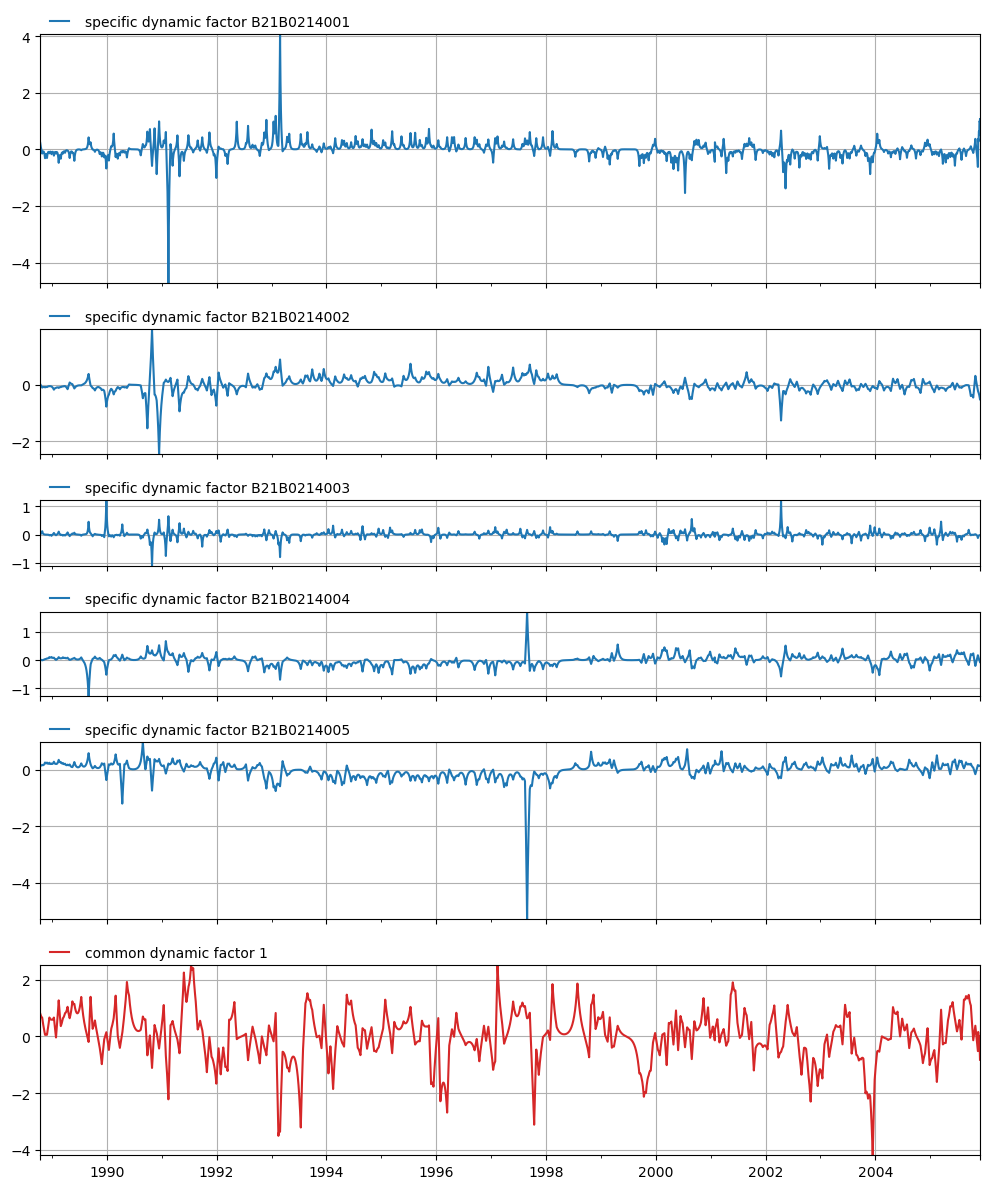

In [8]:
axes = mt.plots.state_means(adjust_height=True)

### Simulations


The simulated mean values for each time series in our Metran model can be obtained with:

In [9]:
# Get all (smoothed) simulated state means
means = mt.get_simulated_means()
means.head(10)

,B21B0214001,B21B0214002,B21B0214003,B21B0214004,B21B0214005
date,,,,,
1988-10-14,5.450000,4.280000,4.620000,4.640000,5.480000
1988-10-15,5.094121,4.132049,4.500647,4.514891,5.348733
1988-10-16,4.781724,3.992287,4.396365,4.399175,5.231284
1988-10-17,4.505266,3.860280,4.306655,4.292536,5.127359
1988-10-18,4.258161,3.735609,4.231336,4.194678,5.036712
1988-10-19,4.034568,3.617869,4.170535,4.105327,4.959142
1988-10-20,3.829204,3.506668,4.124708,4.024229,4.894493
1988-10-21,3.637170,3.401621,4.094661,3.951149,4.842653
1988-10-22,3.453793,3.302355,4.081594,3.885870,4.803556


For obtaining the data for a simulation with the observations and an (optional) confidence interval, use `mt.get_simulation()`.

In [10]:
# Get simulated mean for specific series with/without confidence interval
name = "B21B0214005"
sim = mt.get_simulation(name, alpha=0.05)
sim.head(10)

,mean,lower,upper
date,,,
1988-10-14,5.480000,5.480000,5.480000
1988-10-15,5.348733,1.669956,9.027510
1988-10-16,5.231284,0.273555,10.189012
1988-10-17,5.127359,-0.640237,10.894955
1988-10-18,5.036712,-1.263478,11.336903
1988-10-19,4.959142,-1.669234,11.587519
1988-10-20,4.894493,-1.891043,11.680029
1988-10-21,4.842653,-1.942746,11.628053
1988-10-22,4.803556,-1.824438,11.431550


There is also a method to visualize these results for a single time series including optional confidence interval:

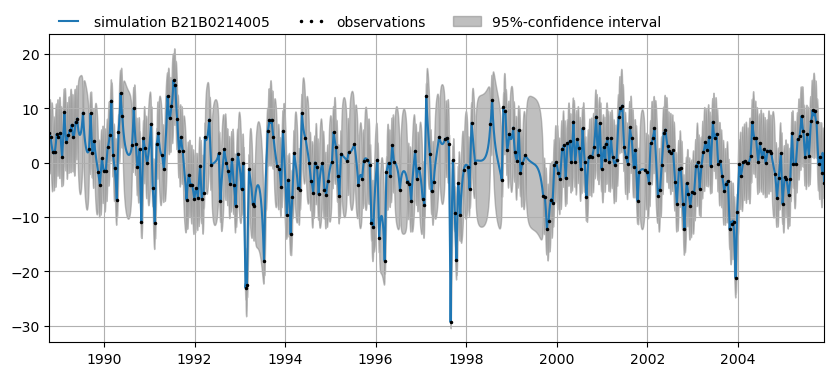

In [11]:
ax = mt.plots.simulation("B21B0214005", alpha=0.05)

Or all for all time series:

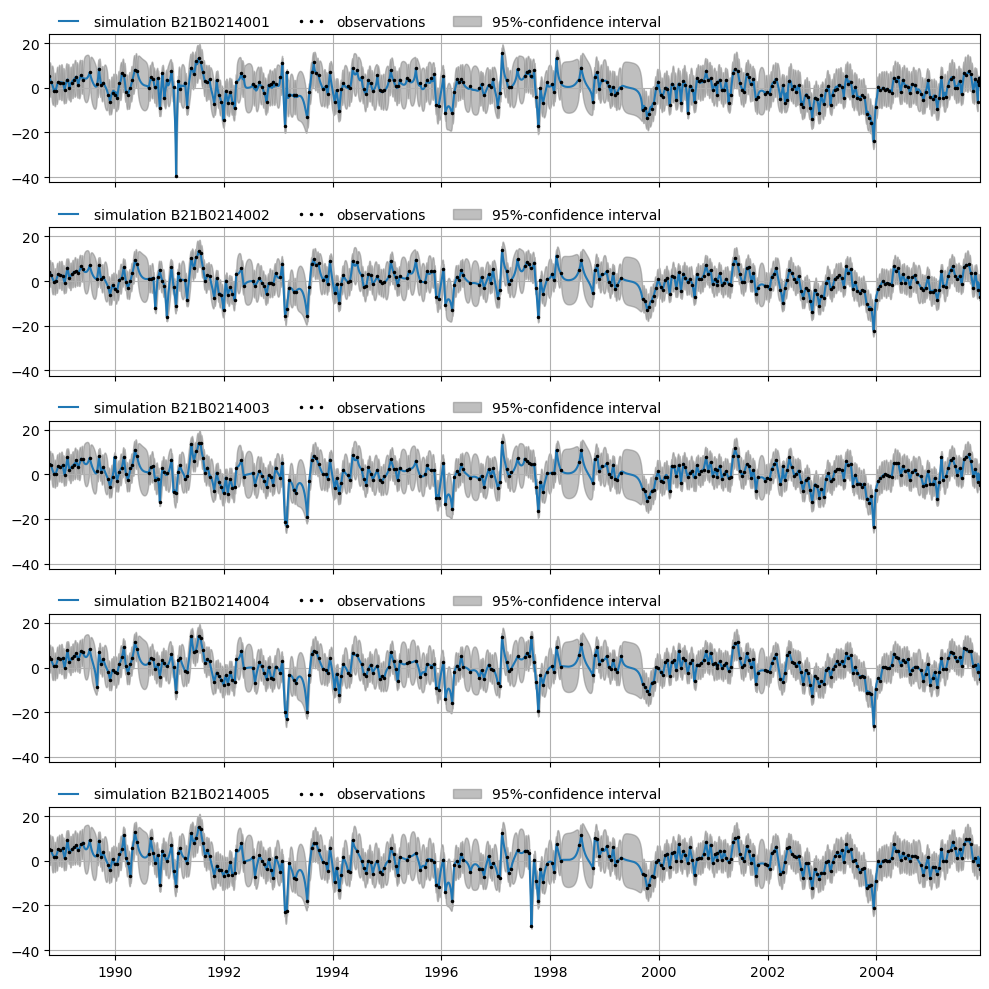

In [12]:
axes = mt.plots.simulations(alpha=0.05)

### Decompositions

The decomposition of a simulation into specific and common dynamic components can be obtained with `mt.decompose_simulation()`.

In [13]:
# Decomposed simulated mean for specific series
decomposition = mt.decompose_simulation("B21B0214001")
decomposition.head(10)

,sdf,cdf1
date,,
1988-10-14,1.339364,4.110636
1988-10-15,1.080942,4.013179
1988-10-16,0.858403,3.923322
1988-10-17,0.664372,3.840894
1988-10-18,0.492420,3.765741
1988-10-19,0.336849,3.697720
1988-10-20,0.192504,3.636701
1988-10-21,0.054601,3.582569
1988-10-22,-0.081428,3.535222


This can also be visualized:

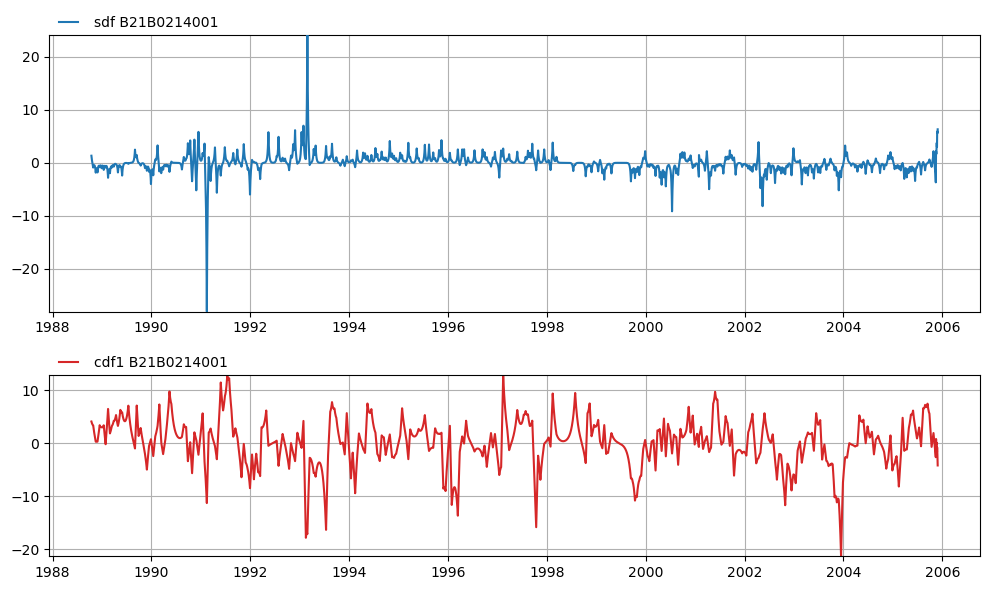

In [14]:
axes = mt.plots.decomposition("B21B0214001", split=True, adjust_height=True)

Or for all time series

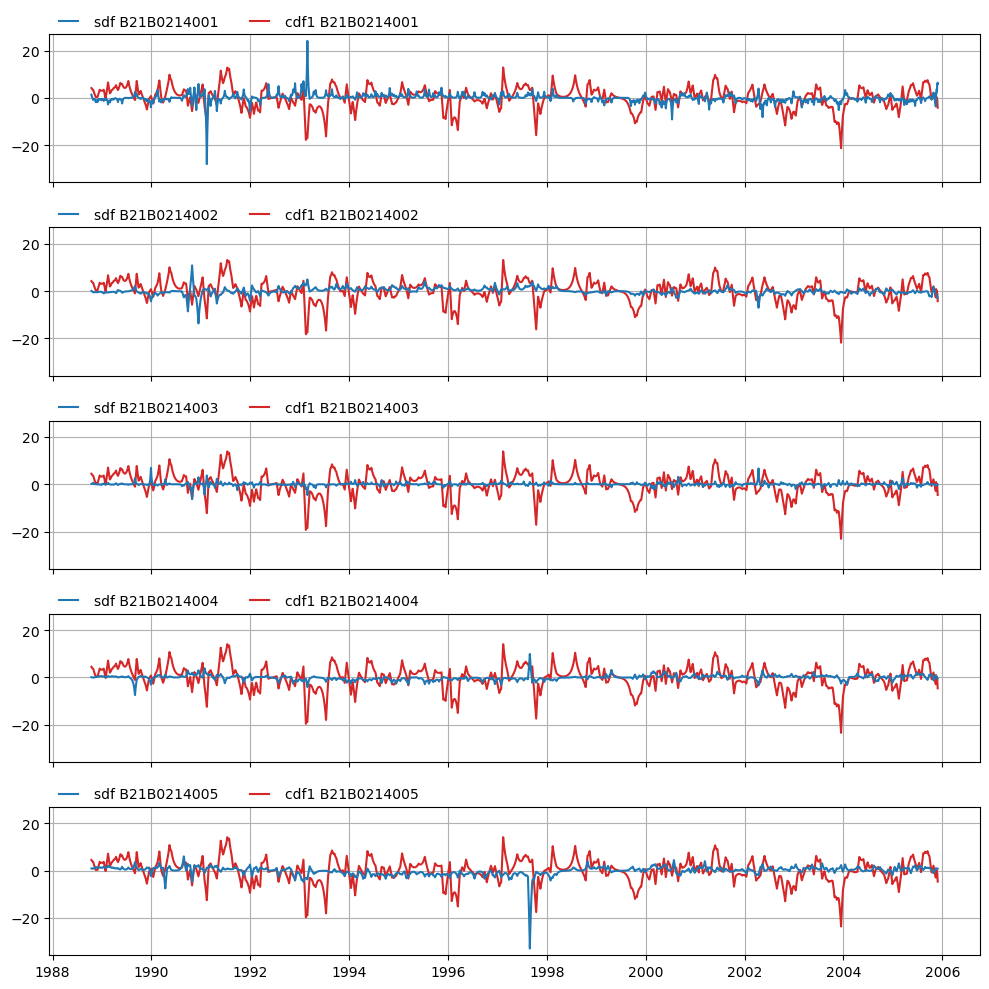

In [15]:
axes = mt.plots.decompositions()

## Example application: removing outliers

The Kalman smoother can be re-run after removing (masking) outliers from the observations. This is illustrated below.

First plot the simulation for the original data:

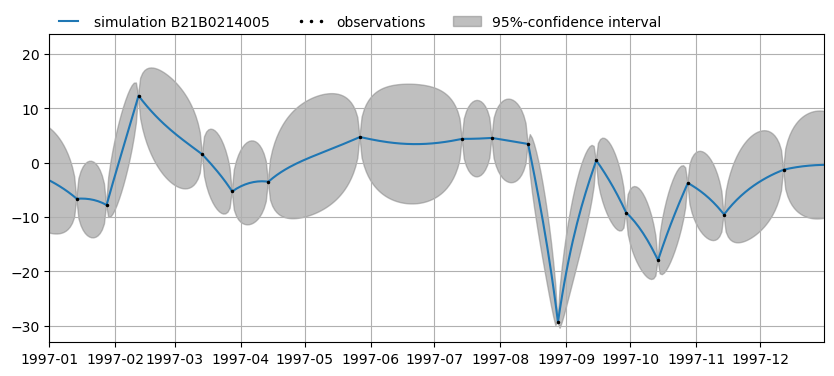

In [16]:
name = "B21B0214005"
alpha = 0.05

ax1 = mt.plots.simulation(name, alpha=alpha, tmin="1997-01-01", tmax="1997-12-31")

Mask (remove) the outlier on 28 august 1997.

In [17]:
oseries = mt.get_observations()
mask = (0 * oseries).astype(bool)
mask.loc["1997-8-28", name] = True
mt.mask_observations(mask)

Now plot the simulation again. Note the estimated value and its 95%-confidence interval for the observation on 28 August 1997 based on the common dynamic factor.

INFO: Running Kalman filter with masked observations.


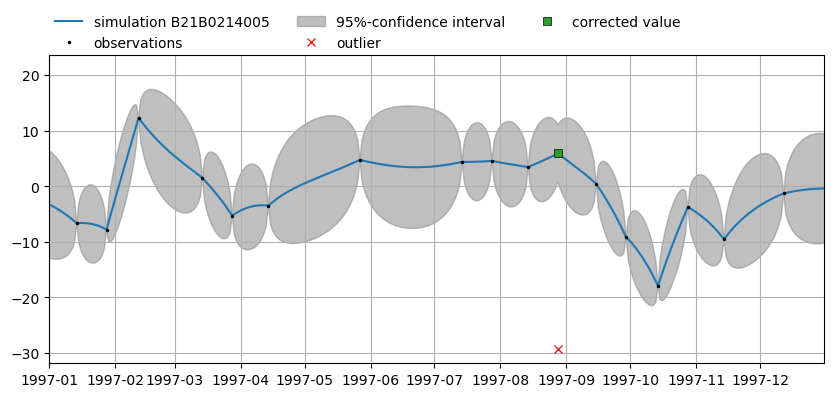

In [18]:
# remove outlier from series B21B0214005 at 1997-8-28
# and re-run smoother to get estimate of observation
# (Fig 3 in Stromingen without deterministic component)
ax2 = mt.plots.simulation(name, alpha=alpha, tmin="1997-01-01", tmax="1997-12-31")
sim = mt.get_simulation(name, alpha=None).loc[["1997-8-28"]]

# plot outlier and corrected value
outlier = oseries.loc[["1997-8-28"], name]
ax2.plot(outlier.index, outlier, "C3x", label="outlier")
ax2.plot(sim.index, sim, "C2s", label="corrected value", mec="k", mew=0.5)
ax2.legend(loc=(0, 1), numpoints=1, frameon=False, ncol=3)

To reset the observations (remove all masks):

In [19]:
# unmask observations to get original observations
mt.unmask_observations()

## References

- Van Geer, F.C. en W.L. Berendrecht (2015) Meervoudige tijdreeksmodellen en de samenhang in stijghoogtereeksen. Stromingen 23 nummer 3, pp. 25-36.